In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [32]:
path='../input/Mall_Customers.csv'
dl=pd.read_csv(path)
dl.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
dl.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
dl.shape

(200, 5)

In [30]:
dl.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [7]:
dl.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [8]:
dl.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
dl.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

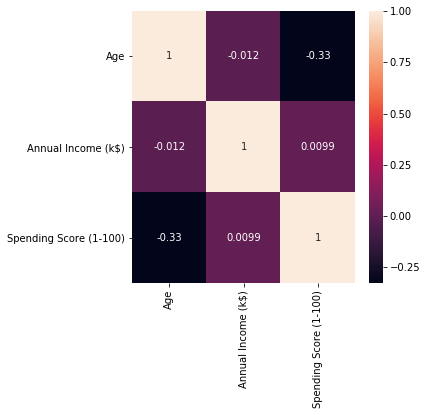

In [35]:
plt.rcParams['figure.figsize']=(5,5)
hm=sns.heatmap(dl[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].corr(), annot = True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


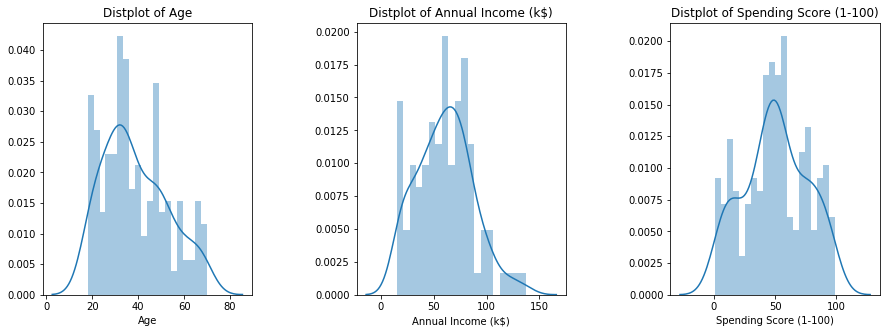

In [37]:
plt.figure(1 , figsize = (15 , 5))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dl[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


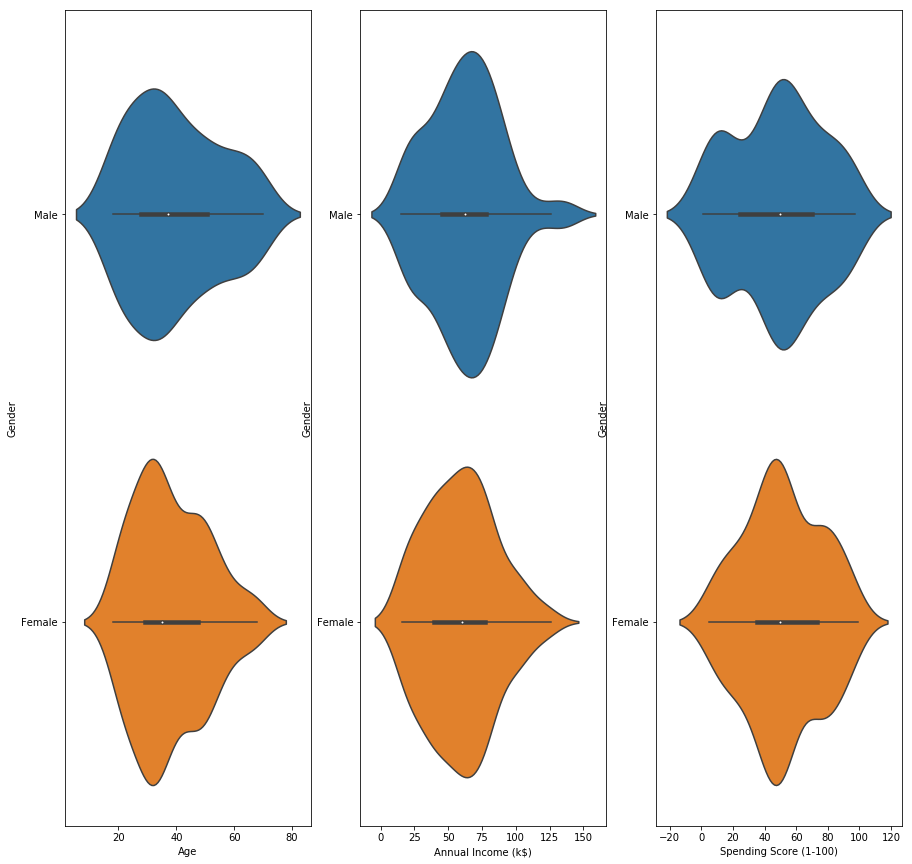

In [40]:
plt.figure(1 , figsize = (15 , 15))
n = 0 
for cols in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    sns.violinplot(x = cols , y = 'Gender' , data = dl )
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


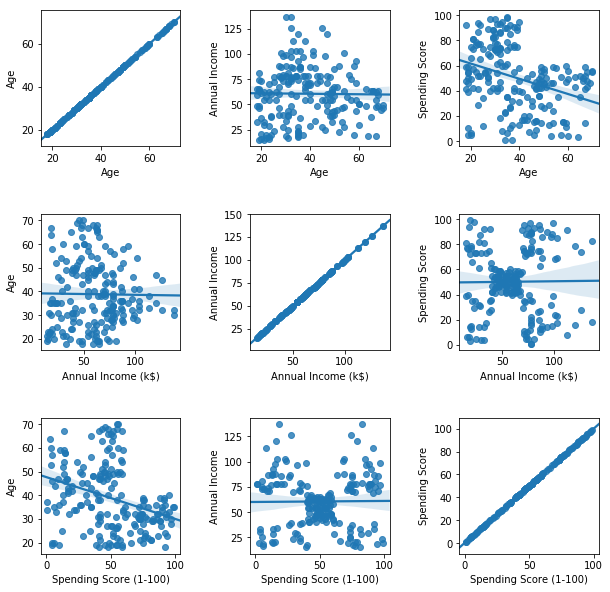

In [26]:
n = 0 
for x in [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']:
    for y in [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = dl)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

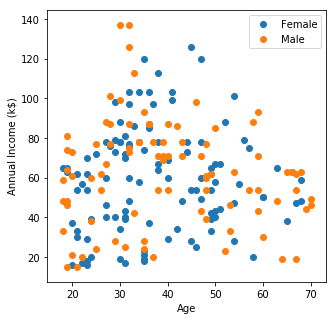

In [48]:
X1=dl[['Age','Annual Income (k$)']]  
for gen in ['Female','Male']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = dl[dl['Gender'] == gen] ,label = gen)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.legend()
plt.show()

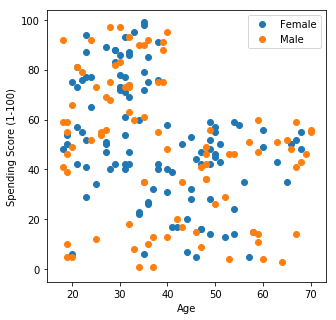

In [47]:
X2=dl[['Age','Spending Score (1-100)']]  
for gen in ['Female','Male']:
    plt.scatter(x = 'Age' , y = 'Spending Score (1-100)' , data = dl[dl['Gender'] == gen] ,label = gen)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)') 
plt.legend()
plt.show()

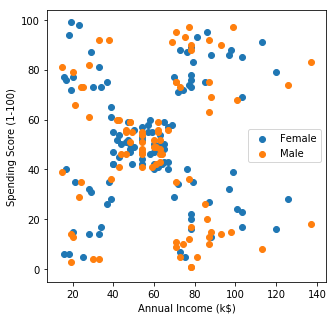

In [46]:
X3=dl[['Annual Income (k$)','Spending Score (1-100)']]  
for gen in ['Female','Male']:
    plt.scatter(x ='Annual Income (k$)' , y = 'Spending Score (1-100)' , data = dl[dl['Gender'] == gen] ,label = gen)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.legend()
plt.show()

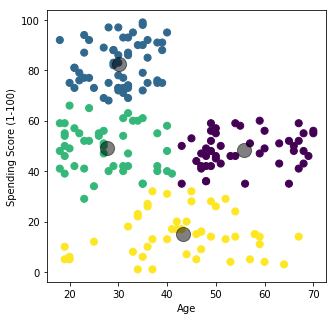

In [66]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)

plt.scatter(X2['Age'], X2['Spending Score (1-100)'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

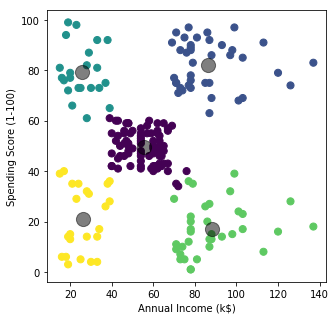

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X3)
y_kmeans = kmeans.predict(X3)

plt.scatter(X3['Annual Income (k$)'], X3['Spending Score (1-100)'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);